In [1]:
import sys
import os
sys.path.append(os.path.abspath("Pytorch/"))
sys.path.append(os.path.abspath("models/"))

In [2]:
from FBSNNs import *
from ForwardContracts import *

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 64  # number of trajectories (batch size)
N = 100 # number of time snapshots
D = 10 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 2 * [30] + [1]

Xi = np.array([1.0] * D)[None, :]
T = 1.0

"Available architectures"
mode = "NAIS-Net"  # FC, Resnet and NAIS-Net are available
activation = "Sine"  # Sine and ReLU are available
model = ForwardContracts(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2*10**4
lr = 1e-3

In [4]:
model.load_model("models/Forward10D.pth")

In [5]:
graph = model.iteration, model.training_loss

In [5]:
n_iter = 11*10**2
lr = 1e-5

In [6]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 19900, Loss: 2.042e-02, Y0: 0.182, Time: 0.12, Learning Rate: 1.000e-05
It: 20000, Loss: 2.777e-03, Y0: 0.198, Time: 9.37, Learning Rate: 1.000e-05
It: 20100, Loss: 2.046e-03, Y0: 0.198, Time: 9.28, Learning Rate: 1.000e-05
It: 20200, Loss: 1.986e-03, Y0: 0.198, Time: 9.37, Learning Rate: 1.000e-05
It: 20300, Loss: 2.231e-03, Y0: 0.198, Time: 9.15, Learning Rate: 1.000e-05
It: 20400, Loss: 3.074e-03, Y0: 0.198, Time: 9.12, Learning Rate: 1.000e-05
It: 20500, Loss: 2.643e-03, Y0: 0.198, Time: 9.19, Learning Rate: 1.000e-05
It: 20600, Loss: 2.204e-03, Y0: 0.198, Time: 9.39, Learning Rate: 1.000e-05
It: 20700, Loss: 1.805e-03, Y0: 0.198, Time: 9.31, Learning Rate: 1.000e-05
It: 20800, Loss: 1.537e-03, Y0: 0.199, Time: 9.25, Learning Rate: 1.000e-05
It: 20900, Loss: 8.639e-03, Y0: 0.198, Time: 9.28, Learning Rate: 1.000e-05
total time: 102.08882284164429 s


In [6]:
np.random.seed(37)
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

for i in range(63):
    t_test_i, W_test_i = model.fetch_minibatch()
    X_pred_i, Y_pred_i = model.predict(Xi, t_test_i, W_test_i)
    if type(X_pred_i).__module__ != 'numpy':
        X_pred_i = X_pred_i.cpu().detach().numpy()
    if type(Y_pred_i).__module__ != 'numpy':
        Y_pred_i = Y_pred_i.cpu().detach().numpy()
    if type(t_test_i).__module__ != 'numpy':
        t_test_i = t_test_i.cpu().numpy()
    t_test = np.concatenate((t_test, t_test_i), axis=0)
    X_pred = np.concatenate((X_pred, X_pred_i), axis=0)
    Y_pred = np.concatenate((Y_pred, Y_pred_i), axis=0)

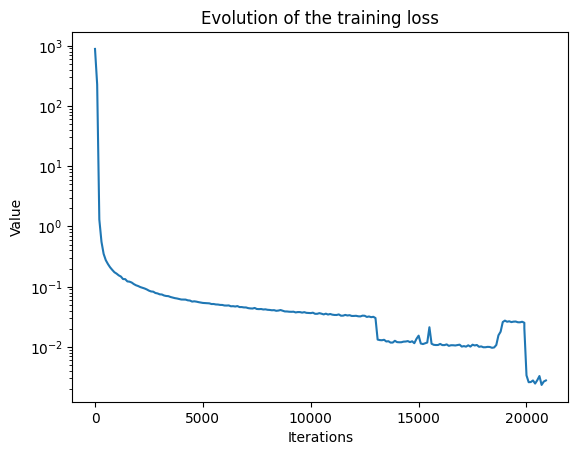

In [7]:
plt.figure()
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
plt.show()

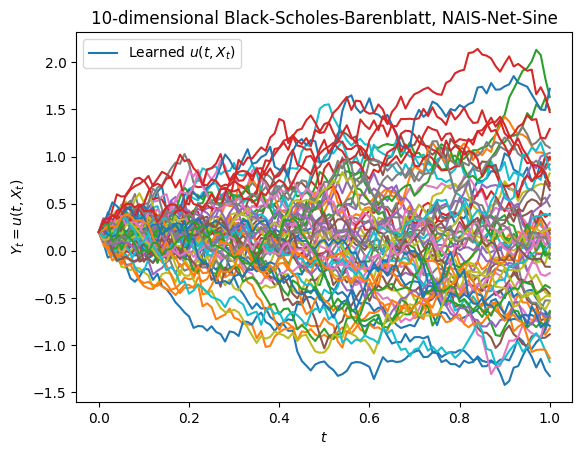

In [8]:
samples = 64

plt.figure()
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, label='Learned $u(t,X_t)$')


plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T)

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()

plt.show()

In [11]:
model.save_model("models/Forward10D.pth")